## Context
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months. The data is stored in the CardioGoodFitness.csv file.

## Objective
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

## Data Dictionary
The team identified the following customer variables to study:

- Product: Product purchased - TM195, TM498, or TM798
- Gender: Male or Female
- Age: Age of the customer in years
- Education: Education of the customer in years
- MaritalStatus: Single or partnered
- Income: Annual household income
- Usage: The average number of times the customer plans to use the treadmill each week;
- Miles: The average number of miles the customer expects to walk/run each week;
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

## Questions to explore
- What are the different types of variables in the data?
- What is the distribution of different variables in the data?
- Which product is more popular among males or females?
- Is the product purchase affected by the marital status of the customer?
- Is there a significant correlation among some of the variables?
- What is the distribution of the average number of miles for each product?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s

DATASET_LOCATION = R"C:\Users\William\Desktop\formação\mit\code\case_study_cardiogood\CardioGoodFitness.csv"

In [3]:
cardiogood = pd.read_csv(DATASET_LOCATION)
cardiogood.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
cardiogood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
cardiogood.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [9]:
number = cardiogood.select_dtypes(include=[np.number])
categories = cardiogood.select_dtypes(exclude=[np.number])
print("Numbers:", number.columns)
print("Categories:", categories.columns)

Numbers: Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')
Categories: Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')


## Univariate Analysis

# Categories

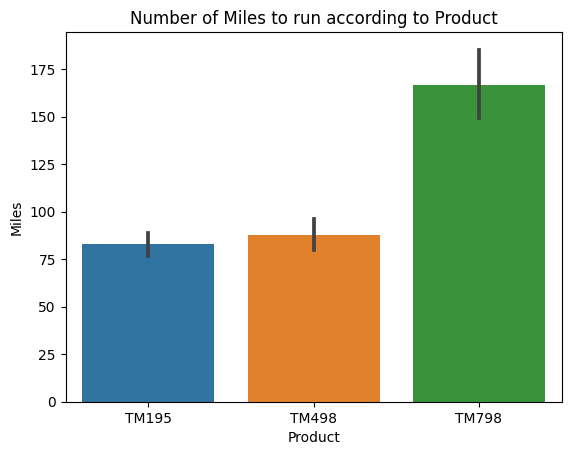

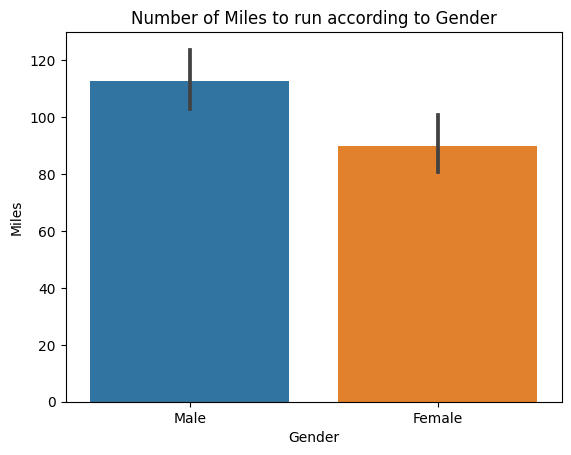

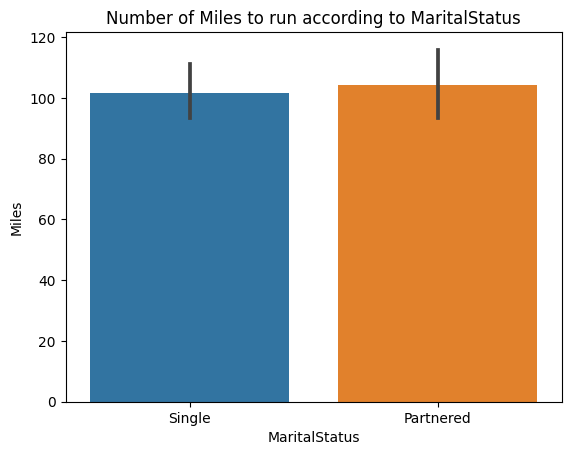

In [19]:
for category in categories.columns:
    s.barplot(data=cardiogood, x=category, y="Miles")
    plt.title(f"Number of Miles to run according to {category}")
    plt.show()

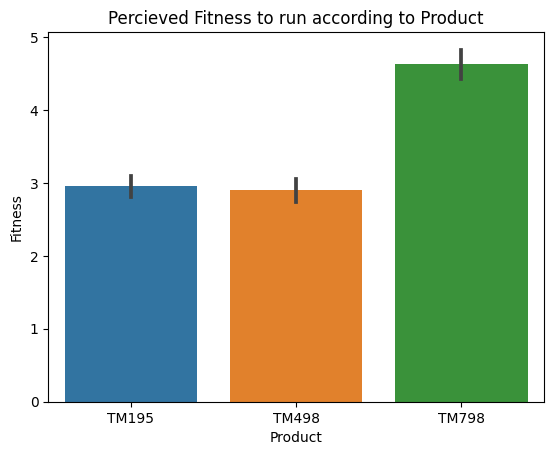

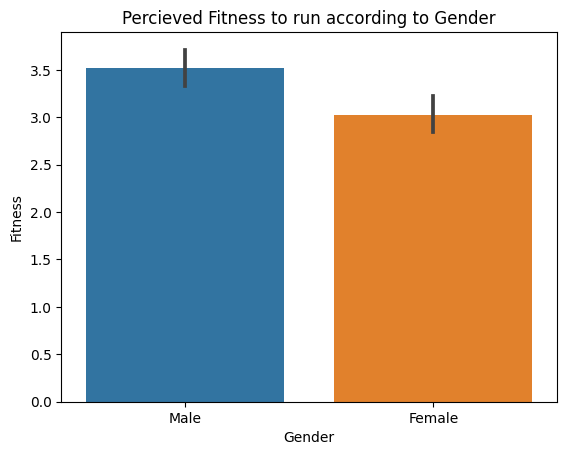

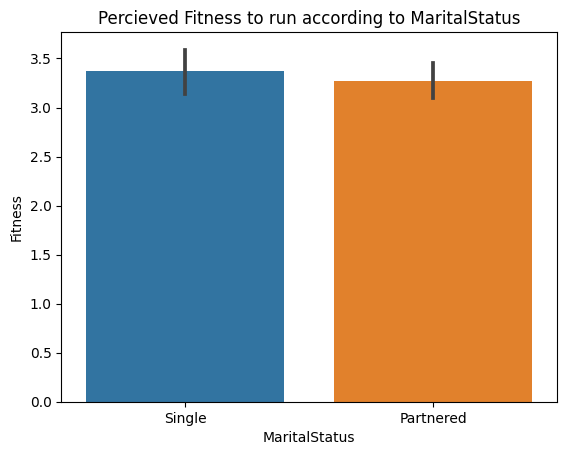

In [21]:
for category in categories.columns:
    s.barplot(data=cardiogood, x=category, y="Fitness")
    plt.title(f"Percieved Fitness to run according to {category}")
    plt.show()

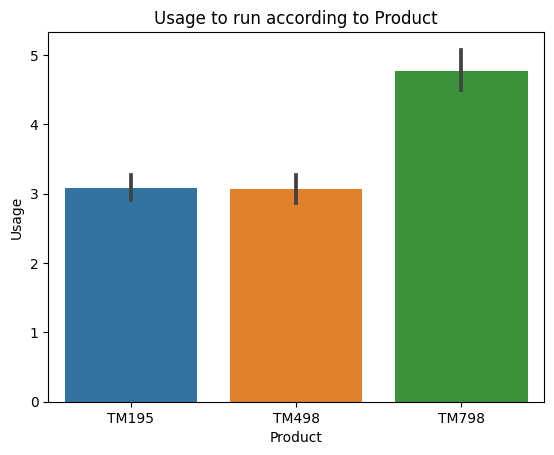

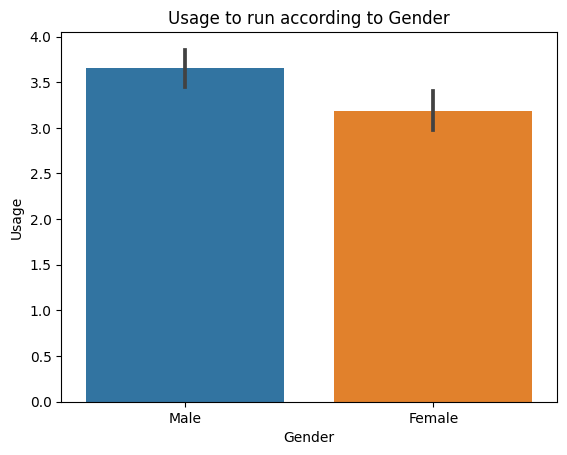

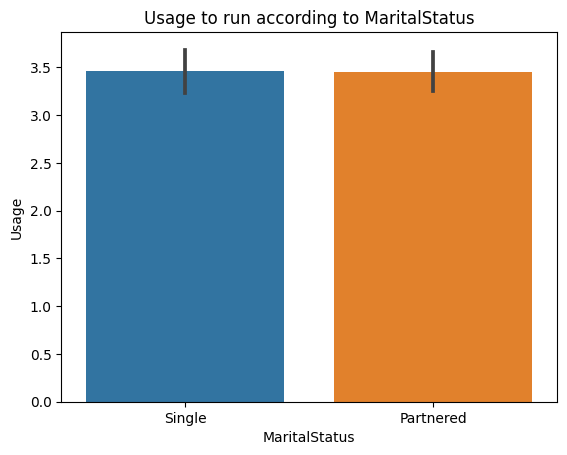

In [22]:
for category in categories.columns:
    s.barplot(data=cardiogood, x=category, y="Usage")
    plt.title(f"Usage to run according to {category}")
    plt.show()

# Number

In [23]:
number.columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

<Axes: xlabel='Age', ylabel='Fitness'>

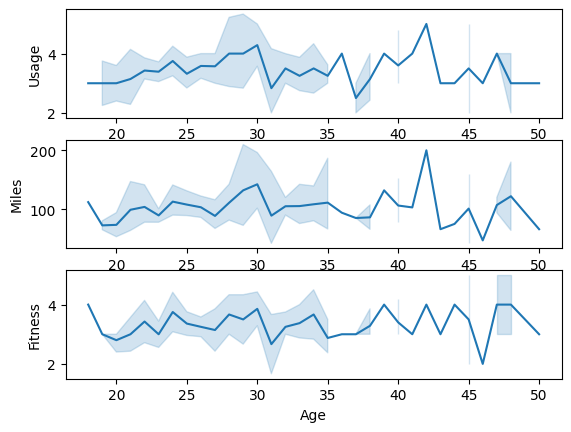

In [35]:
(fig, ax) = plt.subplots(3)
s.lineplot(data=cardiogood, x="Age", y="Usage", ax=ax[0])
s.lineplot(data=cardiogood, x="Age", y="Miles", ax=ax[1])
s.lineplot(data=cardiogood, x="Age", y="Fitness", ax=ax[2])

<Axes: xlabel='Education', ylabel='Fitness'>

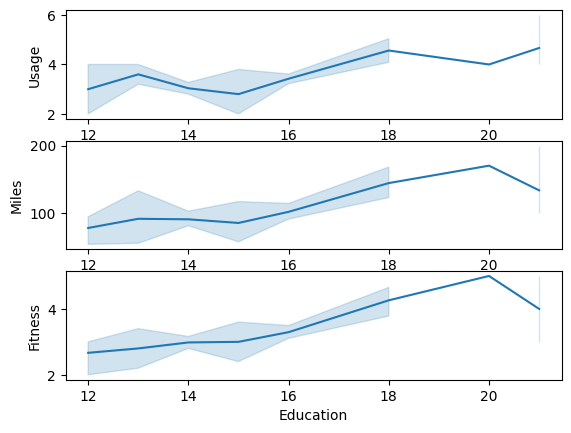

In [36]:
(fig, ax) = plt.subplots(3)
s.lineplot(data=cardiogood, x="Education", y="Usage", ax=ax[0])
s.lineplot(data=cardiogood, x="Education", y="Miles", ax=ax[1])
s.lineplot(data=cardiogood, x="Education", y="Fitness", ax=ax[2])

<Axes: xlabel='Income', ylabel='Fitness'>

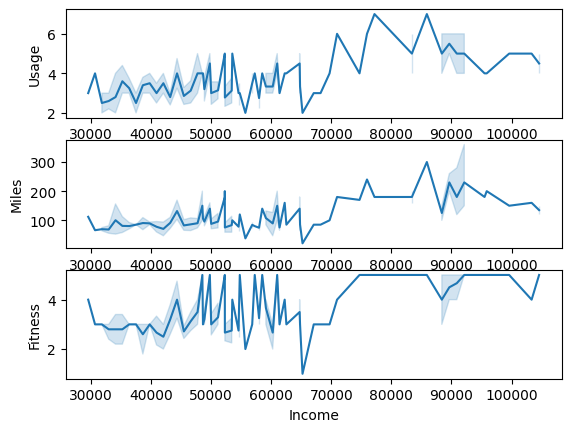

In [37]:
(fig, ax) = plt.subplots(3)
s.lineplot(data=cardiogood, x="Income", y="Usage", ax=ax[0])
s.lineplot(data=cardiogood, x="Income", y="Miles", ax=ax[1])
s.lineplot(data=cardiogood, x="Income", y="Fitness", ax=ax[2])

<Axes: xlabel='Fitness', ylabel='Miles'>

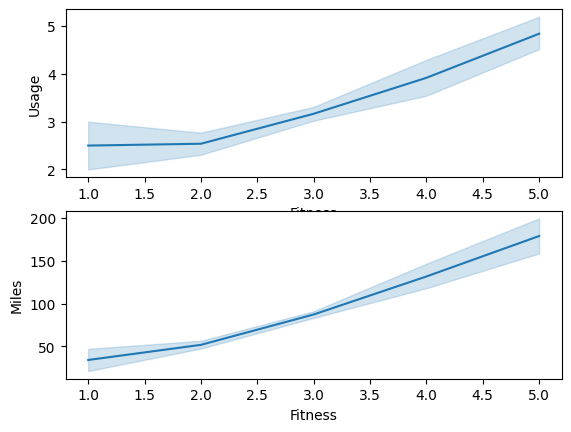

In [40]:
(fig, ax) = plt.subplots(2)
s.lineplot(data=cardiogood, x="Fitness", y="Usage", ax=ax[0])
s.lineplot(data=cardiogood, x="Fitness", y="Miles", ax=ax[1])

<Axes: xlabel='Usage', ylabel='Miles'>

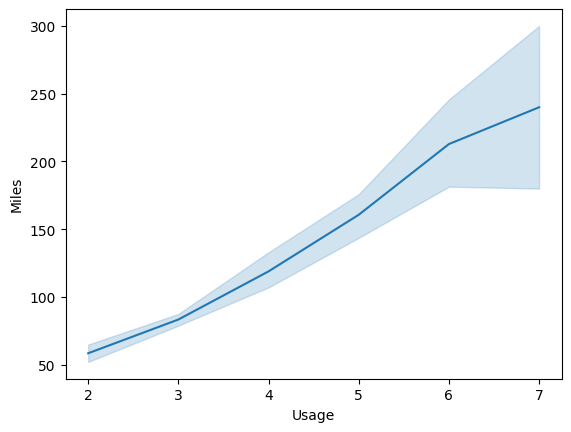

In [42]:
s.lineplot(data=cardiogood, x="Usage", y="Miles")

# Correlation

C:\Users\William\AppData\Local\Temp\ipykernel_13240\3747045933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s.heatmap(data=cardiogood.corr(), annot=True, fmt=".1f", cmap=s.cm.rocket_r,)


<Axes: >

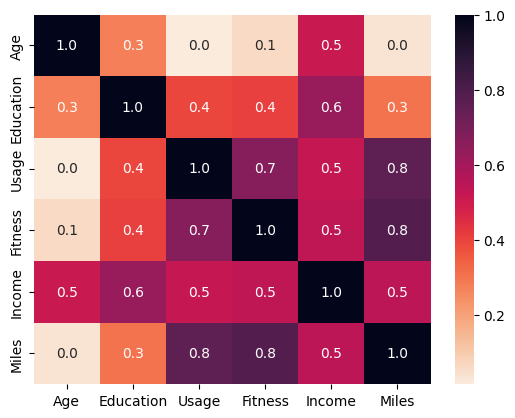

In [51]:
s.heatmap(data=cardiogood.corr(), annot=True, fmt=".1f", cmap=s.cm.rocket_r,)

## Bivatiate Analysis

In [52]:
cardiogood.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<Axes: xlabel='Product', ylabel='Miles'>

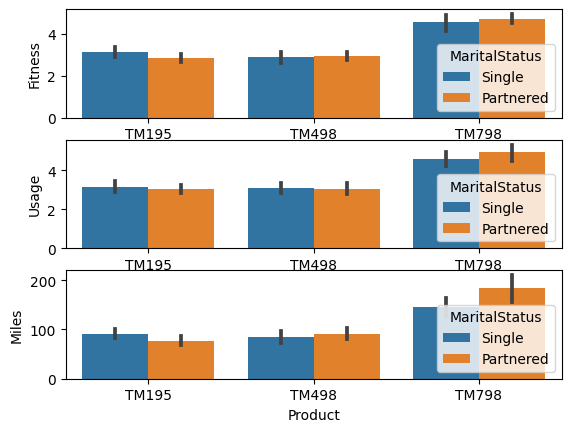

In [54]:
(fig, (ax1, ax2, ax3)) = plt.subplots(3)
s.barplot(data=cardiogood, x="Product", y="Fitness", hue="MaritalStatus", ax=ax1)
s.barplot(data=cardiogood, x="Product", y="Usage", hue="MaritalStatus", ax=ax2)
s.barplot(data=cardiogood, x="Product", y="Miles", hue="MaritalStatus", ax=ax3)

<Axes: xlabel='Education', ylabel='Miles'>

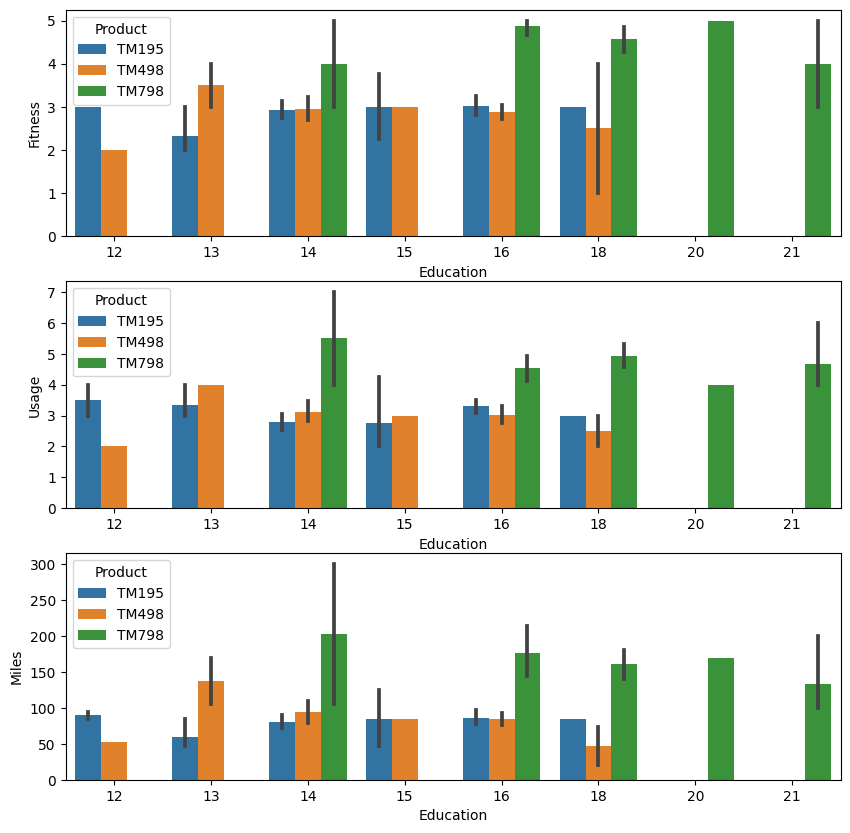

In [57]:
(fig, (ax1, ax2, ax3)) = plt.subplots(3, figsize=(10, 10))
s.barplot(data=cardiogood, x="Education", y="Fitness", hue="Product", ax=ax1)
s.barplot(data=cardiogood, x="Education", y="Usage", hue="Product", ax=ax2)
s.barplot(data=cardiogood, x="Education", y="Miles", hue="Product", ax=ax3)

<Axes: xlabel='Product', ylabel='Miles'>

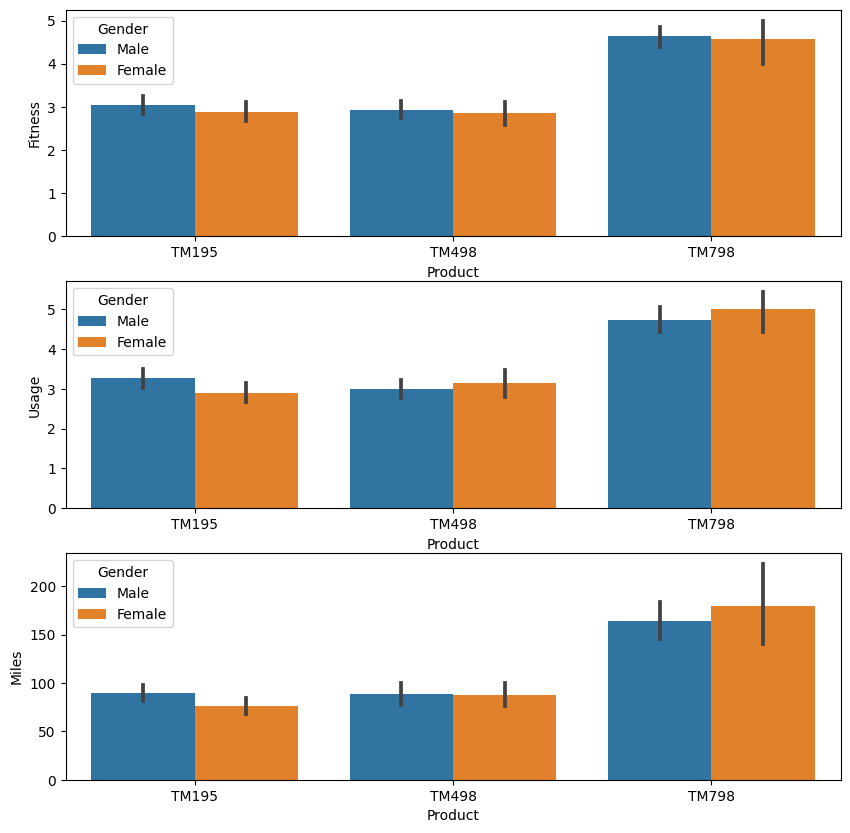

In [58]:
(fig, (ax1, ax2, ax3)) = plt.subplots(3, figsize=(10, 10))
s.barplot(data=cardiogood, x="Product", y="Fitness", hue="Gender", ax=ax1)
s.barplot(data=cardiogood, x="Product", y="Usage", hue="Gender", ax=ax2)
s.barplot(data=cardiogood, x="Product", y="Miles", hue="Gender", ax=ax3)